Treemaps are data visualization tool that displays data as rectangles within a graph. The area of each rectangle is equivalent to the value of the item represented in that rectangle.At their simplest, they display shapes in sizes appropriate to their value, so bigger rectangles represent higher values. Python allows us to create these charts quite easily, as it will calculate the size of each rectangle for us and plot it in a way that fits using squarify library. In this example we learn about how to create treemaps with squarify.Treemaps are important since they consume less space when representing large amount of data.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

In [15]:
music= pd.read_csv("Music Sales.csv")

In [16]:
music.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


In [17]:
music['RSales'] = music.apply(lambda x: x['Quantity'] * x['UnitPrice'], axis=1)

In [18]:
music_filt=music[['Region','Country','Quantity','RSales']]

In [19]:
music_df_1=music_filt.groupby(['Region','Country'])['RSales'].sum().to_frame().sort_values(by='RSales',ascending=False).reset_index()

In [20]:
music_df_1

,Region,Country,RSales
0,North America,USA,1527.50
1,North America,Canada,851.46
2,Europe,France,562.50
3,South America,Brazil,523.78
4,Europe,Germany,421.88
5,Europe,United Kingdom,301.95
6,Europe,Czech Republic,269.72
7,Asia,India,210.91
8,Europe,Portugal,197.05
9,Europe,Hungary,168.61


In [21]:
music_df_1['Percent_of_totals']=((music_df_1['RSales']/music_df_1['RSales'].sum())*100).round(2)

In [22]:
music_df_1

,Region,Country,RSales,Percent_of_totals
0,North America,USA,1527.50,23.02
1,North America,Canada,851.46,12.83
2,Europe,France,562.50,8.48
3,South America,Brazil,523.78,7.90
4,Europe,Germany,421.88,6.36
5,Europe,United Kingdom,301.95,4.55
6,Europe,Czech Republic,269.72,4.07
7,Asia,India,210.91,3.18
8,Europe,Portugal,197.05,2.97
9,Europe,Hungary,168.61,2.54


In [23]:
music_region_filt=music_df_1[(music_df_1.Region =='Asia') | (music_df_1.Region =='Europe')] 

In [24]:
music_region_filt

,Region,Country,RSales,Percent_of_totals
2,Europe,France,562.50,8.48
4,Europe,Germany,421.88,6.36
5,Europe,United Kingdom,301.95,4.55
6,Europe,Czech Republic,269.72,4.07
7,Asia,India,210.91,3.18
8,Europe,Portugal,197.05,2.97
9,Europe,Hungary,168.61,2.54
10,Europe,Finland,136.77,2.06
12,Europe,Netherlands,132.78,2.00
13,Europe,Ireland,125.93,1.90


In [39]:
norm = matplotlib.colors.Normalize(vmin=min(music_region_filt.Percent_of_totals), vmax=max(music_region_filt.Percent_of_totals))
colors = [matplotlib.cm.Blues(norm(value)) for value in music_region_filt.Percent_of_totals]

In [43]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(45, 25)


<Figure size 3240x1800 with 0 Axes>

In [44]:
r = music_region_filt['Region'].tolist()
s = music_region_filt['Percent_of_totals'].tolist()
c = music_region_filt['Country'].tolist()
assert len(r) == len(s)
labels = []
for i in range(len(r)):
       labels.append("%s\n %.2f" %(c[i], s[i]) +"%")

(0.0, 100.0, 0.0, 100.0)

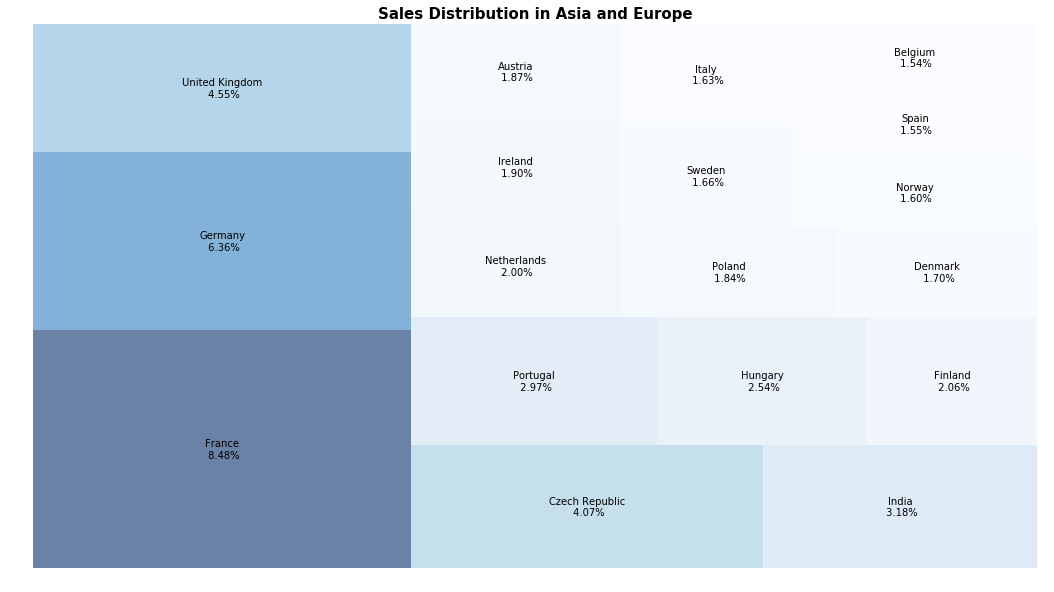

In [45]:
plt.figure(figsize=(18,10))
squarify.plot(label=labels,sizes=s, color = colors, alpha=.6)
plt.title("Sales Distribution in Asia and Europe",fontsize=15,fontweight="bold")
plt.axis('off')